## Importing the needed modules

In [1]:
import sys
print(sys.executable)

/Users/lanresodeinde/opt/anaconda3/bin/python


In [2]:
# !/Users/lanresodeinde/opt/anaconda3/bin/python -m pip install opencv-python
# !/Users/lanresodeinde/opt/anaconda3/bin/python -m pip install rembg

In [3]:
# !pip install --upgrade pip
# !pip3 install --upgrade pip

import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
import time


## Tests

### Testing an image can be read after an import

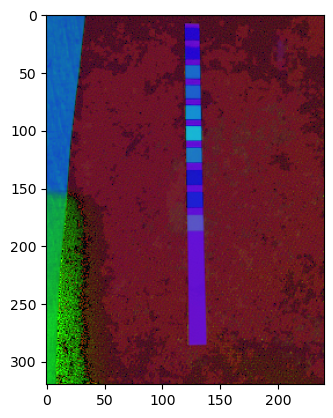

In [4]:
# reading image
img = cv2.imread('/Users/lanresodeinde/Downloads/IMG_0694 Small.png')
img = gray = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = gray = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
# cv2.imshow('Image',img)
plt.imshow(img)


### Testing image can be converted to grayscale

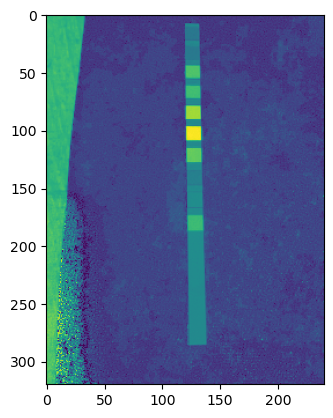

In [5]:
# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('Image',gray)
# cv2_imshow(gray)
plt.imshow(gray)

# cv2_imshow(gray)

Testing thresholding for recognising if the foreground can be reliable removed from the background of a black and white image

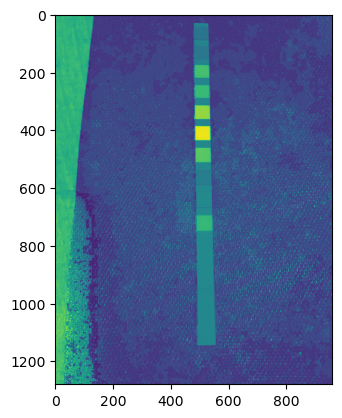

In [4]:
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# cv2_imshow(threshold)
plt.imshow(gray)

### Display all the images

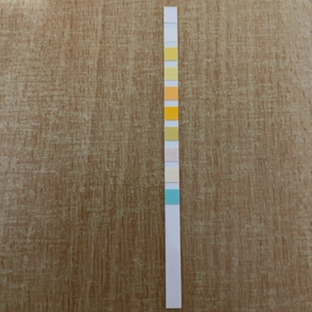

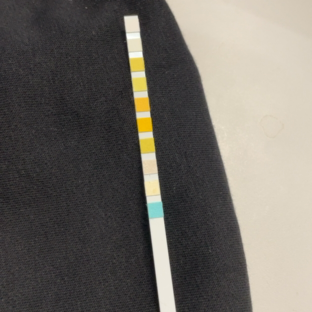

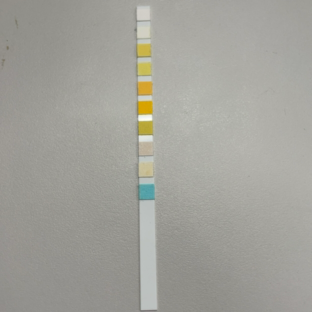

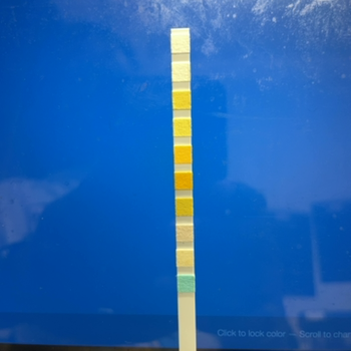

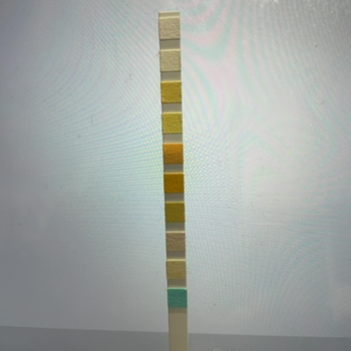

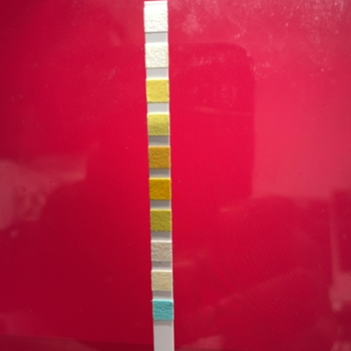

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


paths = ['/content/1676223304.png', '/content/1676322437.png', '/content/1676322641.png', '/content/1676323676.png', \
         '/content/1676323698.png', '/content/1676323713.png' ]
images = []
for path in paths:
  img = cv2.imread(path) # read the image
  images.append(img)
  cv2_imshow(img) # show the image

### Convert all the images to gray scale

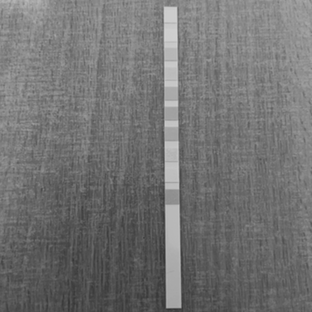

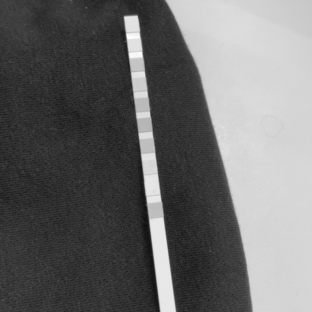

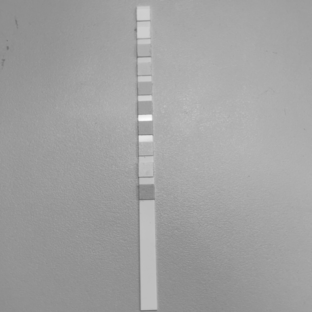

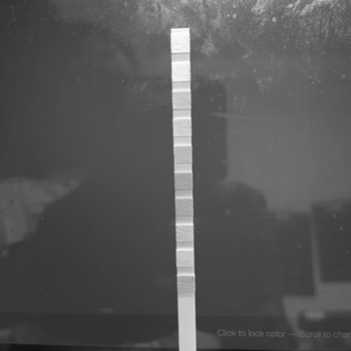

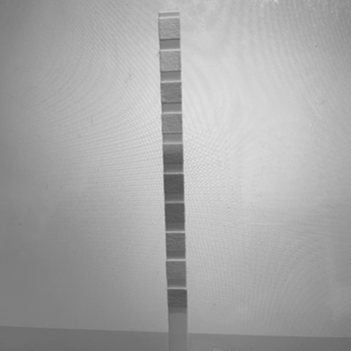

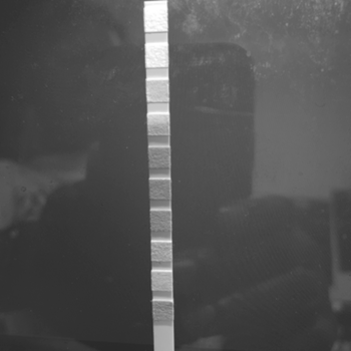

In [15]:
# convert the images to gray scale
gray_images = []
for image in images:
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  gray_images.append(gray)
  cv2_imshow(gray)



# OTSU Thresholding

### Finding Contours in Image

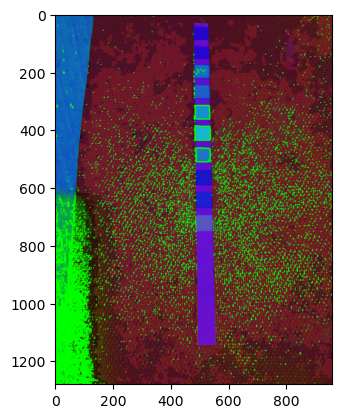

In [6]:
# using a findContours() function
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0), 3)

# print(contours)

# cv2_imshow(img)
plt.imshow(img)

### Recognising Shapes in images

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# reading image
img = cv2.imread('/Users/lanresodeinde/Downloads/IMG_0694.png')

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
i = 0
  
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
  
    # finding center point of shape
    M = cv2.moments(contour)
    x=0
    y=0
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
    # putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
# displaying the image after drawing contours
# cv2_imshow(img)
plt.imshow(img)
  
cv2.waitKey(0)
cv2.destroyAllWindows()

### CROPPING THE IMAGE

The first task is to relaibly crop the dipstick from the background.

Method: 

I will be using OpenCV's cropping alorithm to try to crop the dipstick from the background.
- Will experiment on light background and light backgrounds. 
- Different lighting conditions.


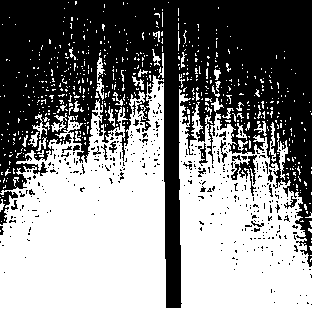

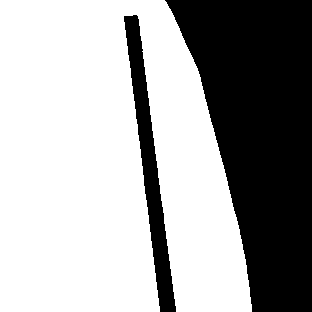

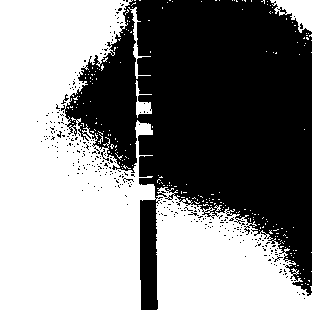

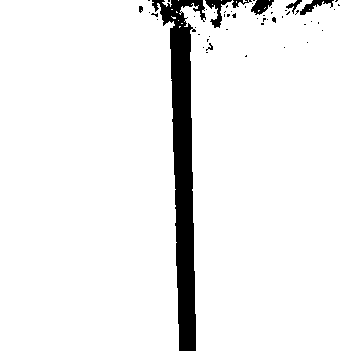

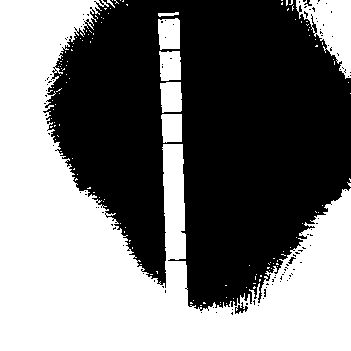

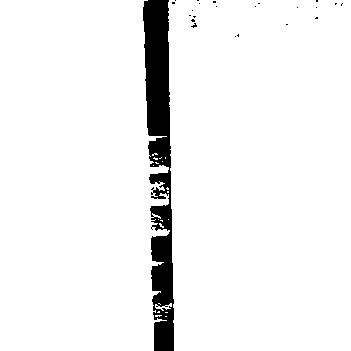

In [ ]:
# Use open cv's threshold
for gray_image in gray_images:
  ret, thresh = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  cv2_imshow(thresh)
  

As you can see from above the image on the black background produces the best image. 

There are some worries about the quality of the image that will be produced on the black background. When the background is purely black, smartphone camera overexpose the image and the image 

# ADAPTIVE THRESHOLDING

From OpenCV's website:

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

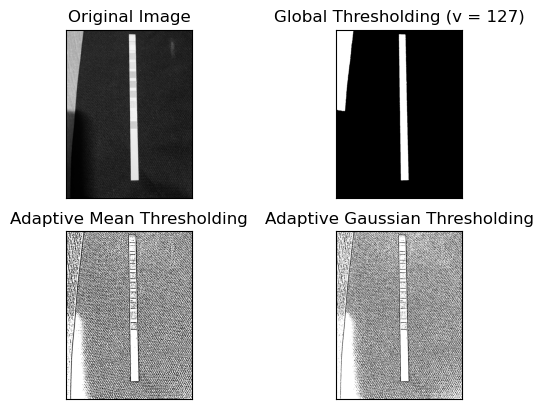

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/Users/lanresodeinde/Downloads/IMG_0694.png',0)

img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)

th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

As you can see above, a standard Global Thresholding seems to perform the best on all the images.

# EDGE DETECTION

Canny Edge Detection vs Sobel Edge Detection

Carrying out edge detection using open cvs sobel edge detection.

- Convert the image to grayscale
- Then blur the image
- The apply both algorithm to the blurred image and see


**Blurring**

According to OpenCV, image blurring is achieved by convolving the image in a low pass kernel. Blurring can be useful for removing noise from an image. 

THere are 4 types of blurring provided by opencv, averaging, gaussian blurring, median blurring and bilateral filtering.


  **Bilateral filtering:**

  It is very effective in removing noise from an image and allowing us to detect the edges in the image. Where the Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average and doesn't consider whether a pixel is an edge or not. 

  Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.


source:https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html


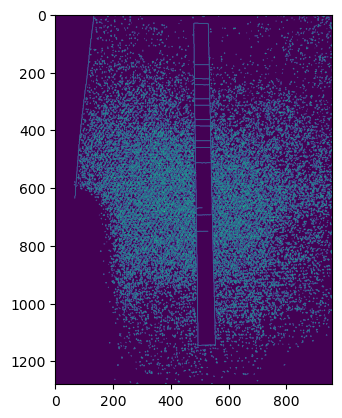

In [10]:
# Read the original image
img = cv2.imread('/Users/lanresodeinde/Downloads/IMG_0694.png') 

def edge_detection(img):
    # Display original image
    #   cv2.imshow("Image", img)
#   cv2.waitKey(0)
    plt.imshow(img)
  
    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (7,7), 0) 

    # Sobel Edge Detection
    sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

    # Display Sobel Edge Detection Images
    # cv2_imshow(sobelx)
    # cv2.waitKey(0)
    # cv2_imshow(sobely)
    # cv2.waitKey(0)
    # cv2_imshow(sobelxy)
    # cv2.waitKey(0)

    # Canny Edge Detection
    # edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
    edges = cv2.Canny(image=img, threshold1=200, threshold2=300) # Canny Edge Detection


    # Display Canny Edge Detection Image
#     cv2.imshow(edges)
#     cv2.waitKey(0)
#     edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
    plt.imshow(edges)

    cv2.destroyAllWindows()

edge_detection(img)

As you can see above the canny edge detection algorithm by open cv does a pretty good job of detecting the edges in the image.

Is there a way I can incorporate this into the algorithm?

Maybe use edge detection to segment the application and crop the image.

## CROPPING IMAGE USING THRESHOLDING

Next step, is to figure out how to crop the images received using thresholdinng.

I have attempted that below. The images below are cropped using OTSU's thresholding

(0, 0, 960, 1280)
(0, 0, 960, 1280)


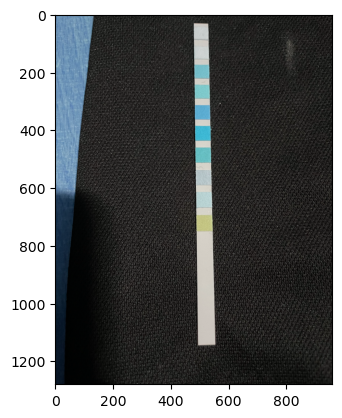

In [15]:
import cv2

img = cv2.imread('/Users/lanresodeinde/Downloads/IMG_0694.png')
# cv2_imshow(img)
plt.imshow(img)
h, w = img.shape[:2]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


thr = cv2.threshold(gray, 192, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
# cv2_imshow(thr)
plt.imshow(thr)

bbox = cv2.boundingRect(thr)

print(bbox)

x, y, w, h = bbox
print(bbox)

foreground = img[y:y+h, x:x+w]

# print(foreground)

# cv2_imshow(foreground)
plt.imshow(foreground)
# cv2.imwrite("foreground.png", foreground)


# image = cv2.imwrite('/content/1676223304.png', thr)




As you can see above, this was a failure. Next I am going to attempt to use PILLOW to crop the image.

# USING PILLOW TO CROP DIPSTICK

Installing the rembg library allows me to remove the background from the images reliably. 

This can also be done by training a model on how to remove the background.

In [20]:
!pip install rembg


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


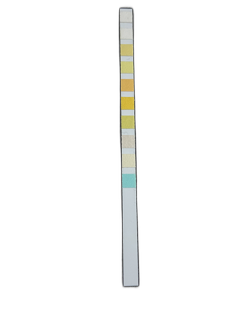

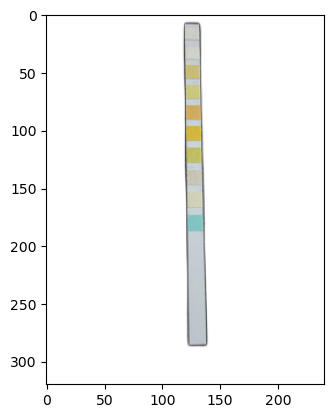

In [37]:
# !pip install rembg
from PIL import Image
from rembg import remove
from matplotlib import pyplot as plt
input_path = '/Users/lanresodeinde/Downloads/IMG_0694 Small.png'
output_path = '/Users/lanresodeinde/Downloads/output.png'

def crop_image(image_path):
    input = Image.open(image_path)
    output = remove(input)
    # output.show()
    plt.imshow(output)
    output.save(output_path)
    return output

crop_image(input_path)

# COLOUR RECOGNITION

### DECTECT SHAPE IN IMAGE

Try to detect the squares in the image

In [ ]:
img = cv2.imread('/content/1676223304.png')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ret , thrash = cv2.threshold(imgGry, 0 , 255, cv2.CHAIN_APPROX_NONE)
# thrash = cv2.threshold(gray, 192, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)[1]
# cv2_imshow(thrash)

contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
  approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
  cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)


# for contour in contours:
#     approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
#     cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
#     x = approx.ravel()[0]
#     y = approx.ravel()[1] - 5

#     if len(approx) == 3:
#         cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
#     elif len(approx) == 4 :
#         x, y , w, h = cv2.boundingRect(approx)
#         aspectRatio = float(w)/h
#         print(aspectRatio)
#         if aspectRatio >= 0.95 and aspectRatio < 1.05:
#             cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

#         else:
#             cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

#     elif len(approx) == 5 :
#         cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
#     elif len(approx) == 10 :
#         cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
#     else:
#         cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


error: ignored

(array([[[  0,   0]],

       [[  0, 350]],

       [[169, 350]],

       [[169, 343]],

       [[168, 342]],

       [[168, 325]],

       [[167, 324]],

       [[167, 307]],

       [[168, 306]],

       [[169, 307]],

       [[169, 312]],

       [[170, 312]],

       [[171, 311]],

       [[173, 311]],

       [[176, 308]],

       [[180, 308]],

       [[181, 307]],

       [[185, 307]],

       [[186, 306]],

       [[187, 307]],

       [[187, 322]],

       [[188, 323]],

       [[188, 348]],

       [[187, 349]],

       [[187, 350]],

       [[350, 350]],

       [[350,   0]]], dtype=int32),)


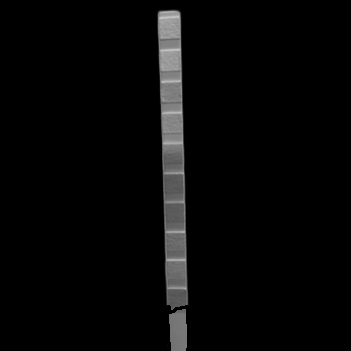

In [ ]:
image = cv2.imread('/content/output.png')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, im = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy  = cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

img = cv2.drawContours(img_gray, contours, -1, (0,255,75), 2)
cv2_imshow(img)

# Detecting Squares from the image using opencv

In [ ]:
def find_squares(img):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    squares = []
    for gray in cv2.split(img):
        for thrs in range(0, 255, 26):
            if thrs == 0:
                bin = cv2.Canny(gray, 0, 50, apertureSize=5)
                bin = cv2.dilate(bin, None)
            else:
                _retval, bin = cv2.threshold(gray, thrs, 255, cv2.THRESH_BINARY)
            contours, _hierarchy = cv2.findContours(bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            for cnt in contours:
                cnt_len = cv2.arcLength(cnt, True)
                cnt = cv2.approxPolyDP(cnt, 0.02*cnt_len, True)
                if len(cnt) == 4 and cv2.contourArea(cnt) > 1000 and cv2.isContourConvex(cnt):
                    cnt = cnt.reshape(-1, 2)
                    max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                    #print(cnt)
                    a = (cnt[1][1] - cnt[0][1])

                    if max_cos < 0.1 and a < img.shape[0]*0.8:

                        squares.append(cnt)
    return squares

dipstick = cv2.imread('/content/1676323628.png')
squares = find_squares(dipstick)
cv2.drawContours(dipstick, squares, -1, (0, 255, 0), 3)

NameError: ignored

CHAT GPT ANSWER

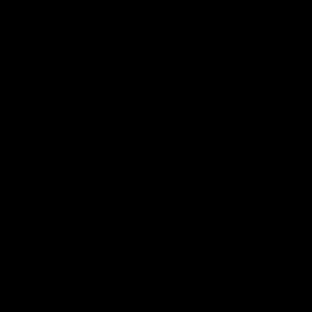

Red pad: 1
Green pad: 0
Blue pad: 0


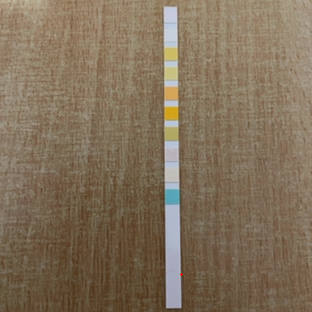

In [ ]:
import cv2
import numpy as np

# Load the image from file
img = cv2.imread('/content/1676223304.png')

# Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the color ranges for the dipstick pads
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])
lower_green = np.array([50, 50, 50])
upper_green = np.array([70, 255, 255])
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])
lower_yellow = np.array([49, 52, 60])
upper_yellow = np.array([49, 80, 49])


# Threshold the image to extract the colors of interest
mask_red = cv2.inRange(hsv, lower_red, upper_red)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

cv2_imshow(mask_yellow)


# Find the contours of the colored areas
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_blue, _ = cv2.findContours(mask_yellow, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(img, contours_red, -1, (0, 0, 255), 2)
cv2.drawContours(img, contours_green, -1, (0, 255, 0), 2)
cv2.drawContours(img, contours_blue, -1, (255, 0, 0), 2)

# Output the results
print("Red pad:", len(contours_red))
print("Green pad:", len(contours_green))
print("Blue pad:", len(contours_blue))

# Display the image with contours
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

From ChatGPT: 

Note that this program assumes that the dipstick is positioned consistently in the image, and that the lighting conditions are relatively consistent across images. If the dipstick is not positioned consistently, or the lighting conditions are variable, additional image processing steps may be necessary to compensate for these factors.



---


**What additional steps should be carried out to compensate for those factors?** 


If the dipstick is not consistently positioned in the image, or if the lighting conditions are variable, the following additional image processing steps may help to compensate for these factors:

Image alignment: 

If the dipstick is not consistently positioned in the image, it may be necessary to align the image to a known reference point. This can be done using feature detection and matching techniques, such as SIFT or SURF. These techniques can detect distinctive features in the image, and match them to features in a reference image to determine the transformation needed to align the two images.

Illumination normalization: 

If the lighting conditions are variable, it may be necessary to normalize the illumination across the image. This can be done using techniques such as histogram equalization or adaptive histogram equalization. These techniques adjust the intensity values of the image to increase the contrast and make the image more consistent across different lighting conditions.

Color calibration: 

If the colors in the image appear differently from the true colors, it may be necessary to calibrate the colors. This can be done using color calibration charts or other color reference images. The image can be compared to the reference image, and a transformation can be calculated to adjust the colors in the image to match the true colors.
By incorporating these additional steps, the image processing algorithm can be made more robust to variations in dipstick positioning and lighting conditions, and provide more accurate color detection results.

Self Organising Mapping

An unsupervised artificial neural network algorithm.



# Trying to extract colours on the pads using coordinates

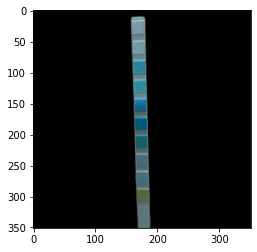

In [ ]:
img = cv2.imread('/content/output.png')
img.shape
plt.imshow(img)

In [ ]:
im = Image.open('/content/1676223304.png') # Can be many different formats.
pix = im.load()
print(im.size)  # Get the width and hight of the image for iterating over
print(pix[120,10])  # Get the RGBA Value of the a pixel of an image
# Set the RGBA Value of the image (tuple)


(312, 312)
(165, 148, 122, 255)


Extracting the colour on a pad at a specific coordinate.
- Convert image to RGB
- Draw a rectangle around a spacific pad.
- Sample that pad

170 92
[155 132  43]


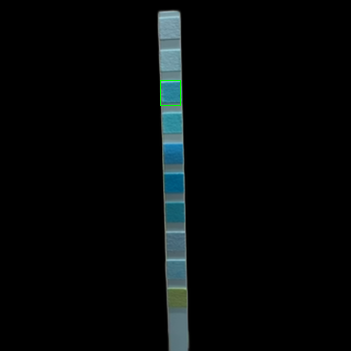

In [ ]:
# img = cv2.imread('/content/1676223304.png') # original

img = cv2.imread('/content/output.png') # original
# convert image to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x1 = 160
y1 = 80
x2 = 180
y2 = 105

rectangle = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0))

midpoint_x = round((x1+x2)/ 2)
midpoint_y = round((y1+y2) / 2)

print(midpoint_x, midpoint_y)
# cv2.rectangle(img, (midpoint_x, midpoint_y), ((midpoint_x+2), (midpoint_y+2)), (0, 255, 0))

colour = img[midpoint_y,midpoint_x] # row major, like in opencv
print(colour)

cv2_imshow(rectangle)
# cv2_imshow(img)

### Extracting the colour on a pad at a specific location and comparing it to the reference colours


In [ ]:
# reference colours
urobilinogen = [[235, 276, 123], [232,161,148], [232, 147, 144], [230, 123, 124], [227,104,119]]

errors =[]


minimum = -1
min_index = -1

for index, i in enumerate(urobilinogen):
  print(i)
  # Eucledian distance
  ed = abs(i[0] - colour[0]) + abs(i[1] - colour[1]) + abs(i[2] - colour[2])
  
  errors.append(ed)

  if minimum == -1:
    minimum = ed
    index = 0
  
  if ed <= minimum:
    minimum = ed
    min_index = index


# d = abs (R - int (esv. Loc[1, "R'])) + abs (G - int(esv. Loc[1, "f"])) + abs(B - int(csv. Loc[i, "B"1))

print(f'Sampled colour: {colour}')
print(f'Errors: {errors}')
print(f'Minimum error: {minimum}')
print(f'Index of minimum error: {min_index}')

[235, 276, 123]
[232, 161, 148]
[232, 147, 144]
[230, 123, 124]
[227, 104, 119]
Sampled colour: [ 24 184 155]
Errors: [335, 238, 256, 298, 319]
Minimum error: 238
Index of minimum error: 1


As you can see from above, By doing some testing on the urobillinogen test.

I calculated the absolute error in for each of the colours and put the results into an array.

From the first test, we can see that this method is not accurate. The input image was of an unused dipstick and the algorithm returned an index of 1 meaning there is a trace when it should have returned 0.

Further testing will be carried out to improve accuracy. The lighting could br affecting the system right now. May need to convert to HSV and see the effect.

### Extracting colour on all 10 pads

Method:
- Draw rectangle around all 10 pads
- Extract the colour on all 10 pads
- Put it into an array


170 342
[ 24  79 144]


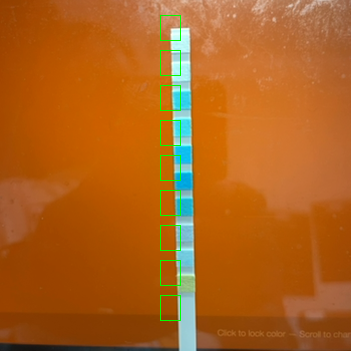

In [ ]:
def draw_rectangle(img):
  # convert image to rgb
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

  # Draw the rectangle - x location
  x1 = 160
  x2 = 180

  # Draw the rectangle - starting y location i.e. first pad
  y1 = 15
  y2 = 40


  # for loop for drawing other rectangles

  for _ in range(9):
    rectangle = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0))
    y1 += 35
    y2 += 35

  
  # rectangle2 = cv2.rectangle(img, (x1, y1+30), (x2, y2+30), (0, 255, 0))


  midpoint_x = round((x1+x2)/ 2)
  midpoint_y = round((y1+y2) / 2)

  print(midpoint_x, midpoint_y)
  # cv2.rectangle(img, (midpoint_x, midpoint_y), ((midpoint_x+2), (midpoint_y+2)), (0, 255, 0))

  colour = img[midpoint_y,midpoint_x] # row major, like in opencv
  print(colour)

  # cv2_imshow(rectangle)
  cv2_imshow(img)


img = cv2.imread('/content/1676323628.png') # original
draw_rectangle(img )

# NEED TO FIND A WAY TO DO IT MORE ACCURATELY: TRY HSV


### Try next:
Maybe try to find the edges of the pad then
Get the dimensions of the edges
The calculate the approximate location of the pads using the dimensions of the edges that were found.




### Clustering

In [20]:
# Load required libraries and image
import cv2
import numpy as np
!pip install skikit-learn
from sklearn.cluster import KMeans
from skimage.segmentation import slic
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
image_path = "/content/output.png" # path of the image
img = cv2.imread(image_path)
h, w, e = img.shape


# GrayScale image
grayscale_img = cv2.imread(image_path, 0)
cv2_imshow(grayscale_img)


cropped_product = img.copy()


# Erosion and contour detection
border = cv2.dilate(grayscale_img, None, iterations=1)
border = border - cv2.erode(border, None)
contours, hierarchy = cv2.findContours(border,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cv2_imshow(border)

print(border.shape)

for c in contours:
    rect = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    
    # Consider countors covering at least 50% of the whole image
    if area > 0.1 * h * w:
         cropped_product = cropped_product[   
             rect[1]:rect[1]+rect[3],
             rect[0]:rect[0]+rect[2]
         ]
         # Run code to identify colors

cropped_product = cropped_product.reshape((cropped_product.shape[0] * cropped_product.shape[1], 3))


# cluster the pixel intensities
clt = KMeans(n_clusters = 10)
clt.fit(cropped_product)

# grab the number of different clusters and create a histogram
# based on the number of pixels assigned to each cluster
numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
(hist, _) = np.histogram(clt.labels_, bins = numLabels)

# normalize the histogram
hist = hist.astype("float")
hist = hist.sum()

# Mapping colours to names
color_dict  = {
    0: 'Grey',
    1: 'Silver',
    2: 'Grey',
    3: 'Light Grey',
    4: 'Dark Grey',
    5: 'Sky Blue',
    6: 'Light Blue', 
}

color_label  = {
    0: [84,84,84],
    1: [192,192,192],
    2: [190,190,190],
    3: [211,211,211],
    4: [119, 136, 153],
    5: [198, 226, 255],
    6: [185,211, 238],
}


# representing the number of pixels labeled to each color
centroids = clt.cluster_centers_
color_values = centroids.astype("uint8").tolist()
colours = {}
for colour_val, hist_val in zip(color_values, hist):
    b1,g1,r1 = colour_val
    min_dis = 9999999
    for k in range(0,6):
        r2,g2,b2 = color_label[k]
        dist = (b1-b2)*(b1-b2) + (g1-g2)*(g1-g2) + (r1-r2)*(r1-r2)
        if dist < min_dis:
            min_dis = dist
            index = k
    if color_dict[index] not in colours:   
        colours[color_dict[index]] = round(hist_val * 100, 4)


print(colours)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement skikit-learn (from versions: none)
ERROR: No matching distribution found for skikit-learn


RuntimeError: ignored

ImportError: ignored

### CHATGPT

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[('pad3', (207.21956992698387, 171.27308834149082, 94.52940704485276)), ('pad2', (206.42172345880869, 180.83787298874066, 66.47014232098398)), ('pad4', (200.74196081853484, 199.10646188751693, 128.22749683668573)), ('pad5', (199.10121118696324, 188.29288702928872, 120.0514864567276)), ('pad1', (191.6097277867226, 188.3990714045007, 104.57284607031865))]


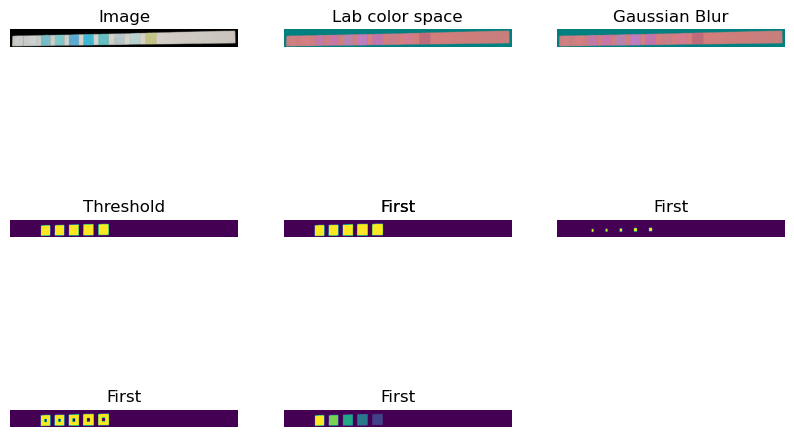

In [50]:
import cv2
import numpy as np
from skimage.segmentation import watershed
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max
from scipy import ndimage
from collections import Counter

# Load the image into Python using the OpenCV library
img = cv2.imread('/Users/lanresodeinde/Downloads/urine-dipstick-cropped.png')
  
# create figure
fig = plt.figure(figsize=(10, 7))

# cv2_imshow(img)
fig.add_subplot(3, 3, 1)
plt.title("Image")
plt.axis('off')
plt.imshow(img)

# Convert the image to the LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# cv2_imshow(lab)
fig.add_subplot(3, 3, 2)
plt.title("Lab color space")
plt.axis('off')
plt.imshow(lab)

# Apply Gaussian blur to smooth the image and reduce noise
blurred = cv2.GaussianBlur(lab, (5, 5), 0)
fig.add_subplot(3, 3, 3)
plt.title("Gaussian Blur")
plt.axis('off')
plt.imshow(blurred)


# Threshold the image to create a binary mask
thresh = cv2.threshold(blurred[:, :, 2], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
fig.add_subplot(3, 3, 4)
plt.title("Threshold")
plt.axis('off')
plt.imshow(thresh)
# cv2_imshow(thresh)

# Apply morphological operations to remove noise and fill gaps in the binary mask
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

fig.add_subplot(3, 3, 5)
plt.title("First")
plt.axis('off')
plt.imshow(opening)
# cv2_imshow(opening)

sure_bg = cv2.dilate(opening, kernel, iterations=3)
fig.add_subplot(3, 3, 5)
plt.title("First")
plt.axis('off')
plt.imshow(sure_bg)
# cv2_imshow(sure_bg)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)


ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
fig.add_subplot(3, 3, 6)
plt.title("First")
plt.axis('off')
plt.imshow(sure_fg)
# cv2_imshow(sure_fg)

sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)
fig.add_subplot(3, 3, 7)
plt.title("First")
plt.axis('off')
plt.imshow(unknown)
# cv2_imshow(unknown)

# Apply the watershed algorithm to segment the color pads
markers = ndimage.label(sure_fg)[0]
labels = watershed(-dist_transform, markers, mask=thresh)

fig.add_subplot(3, 3, 8)
plt.title("First")
plt.axis('off')
plt.imshow(labels)
# cv2_imshow(labels)
print(markers)

# Loop through the segmented color pads and extract the pixels within each pad
colors = {}
for label in np.unique(labels):
    if label == 0:
        continue
    mask = np.zeros(lab.shape[:2], dtype="uint8")
    mask[labels == label] = 255
    pixels = cv2.countNonZero(mask)
    pad_color = cv2.mean(img, mask=mask)[:3][::-1]  # Convert from BGR to RGB
    colors[f'pad{label}'] = pad_color

# Sort the color pads by the number of pixels and return the 10 most common colors in RGB format
sorted_colors = Counter(colors).most_common(10)
sorted_colors_rgb = [(color[0], color[1]) for color in sorted_colors]

# Print the results
print(sorted_colors_rgb)
# [('pad3', (229.26605504587158, 181.66055045871562, 58.76146788990826)), ('pad2', (226.91847826086956, 209.91847826086956, 99.67934782608695)), ('pad1', (222.69587628865978, 198.55670103092783, 82.76288659793815)), ('pad4', (222.13223140495867, 176.33471074380165, 23.082644628099175)), ('pad5', (216.55454545454543, 193.53636363636363, 70.91363636363636))]
# [('pad3', (207.92857142857142, 164.72448979591834, 62.6734693877551)), ('pad4', (204.51541850220266, 165.4229074889868, 33.83700440528634)), ('pad2', (198.3157894736842, 188.53289473684208, 95.23026315789473)), ('pad1', (194.37209302325581, 176.63953488372093, 82.31976744186046)), ('pad5', (179.4630541871921, 164.51231527093597, 66.27093596059113))]

In [ ]:
img = cv2.imread('/Users/lanresodeinde/Downloads/output.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

print(contours)
cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(img)



array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

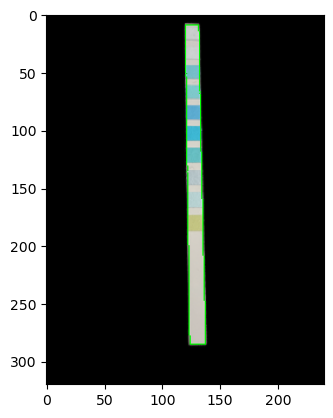

In [9]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/Users/lanresodeinde/Downloads/output.png')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply threshold to the image
ret, thresh = cv2.threshold(gray, 127, 255, 0)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0), 1)
plt.imshow(img)



dipstick = img
# Iterate through the contours and select the one that corresponds to the dipstick
for cnt in contours:
    # print("found")
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 100 and h > 300:
        # Crop out the dipstick
        dipstick = img[y:y+h, x:x+w]
        break

# Convert the dipstick to grayscale
gray_dipstick = cv2.cvtColor(dipstick, cv2.COLOR_BGR2GRAY)

# Apply threshold to the dipstick
ret, thresh_dipstick = cv2.threshold(gray_dipstick, 127, 255, 0)

# Find the vertical center of the dipstick
columns = np.mean(thresh_dipstick, axis=0)
center = np.argmax(columns)

# Draw a vertical line through the center of the dipstick
cv2.line(dipstick, (center, 0), (center, dipstick.shape[0]), (0, 0, 255), 2)

# Display the image with the line
# plt.imshow(dipstick)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

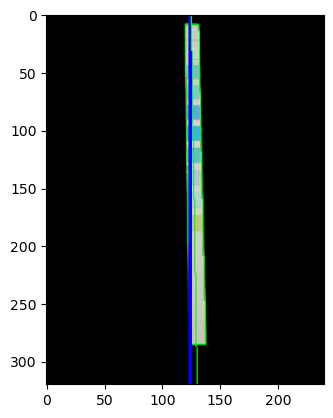

In [10]:
    rows,cols = img.shape[:2]
    [vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
    lefty = int((-x*vy/vx) + y)
    righty = int(((cols-x)*vy/vx)+y)
    cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),1)
    plt.imshow(img)

## Draw Vertical Line through the Dipstick image - Working

(312, 312, 4)
(311, 12419), (0, -8383)
(312, 312, 4)
(311, 12419), (0, -8383)
(312, 312, 4)
(311, 12419), (0, -8383)
(351, 351, 4)
(350, 15019), (0, -8383)
(351, 351, 4)
(350, 15019), (0, -8383)
(351, 351, 4)
(350, 15019), (0, -8383)
(640, 155, 4)
(154, 1951), (0, -8383)


/var/folders/p_/96n4bw_s74v7zvqp0r6khdr80000gn/T/ipykernel_79799/2214675529.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


(320, 240, 4)
(239, 7618), (0, -8383)
(320, 240, 4)
(239, 7618), (0, -8383)


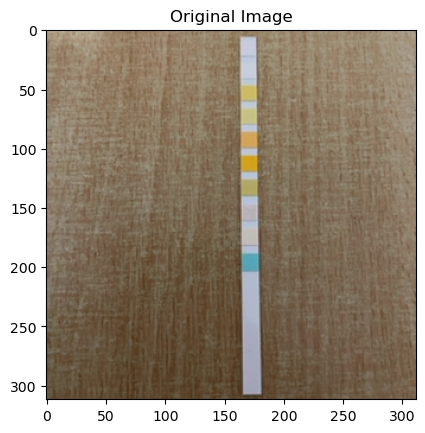

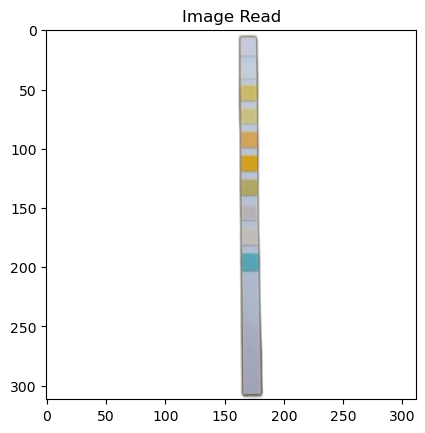

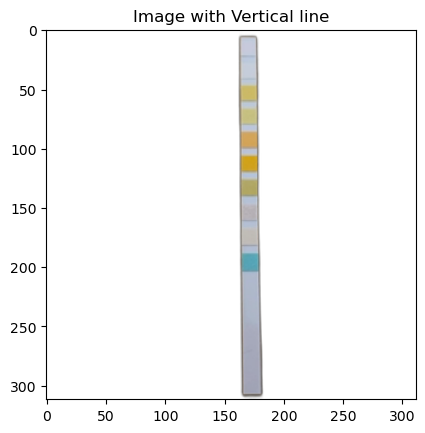

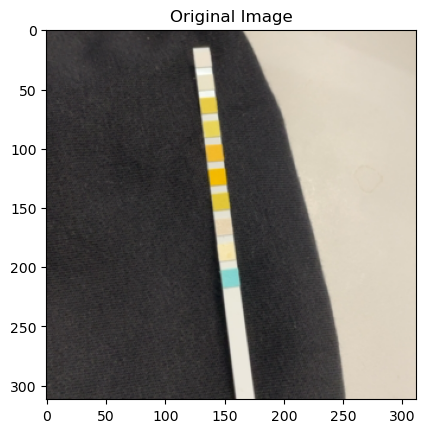

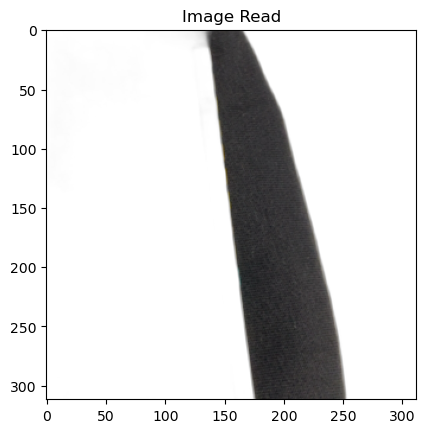

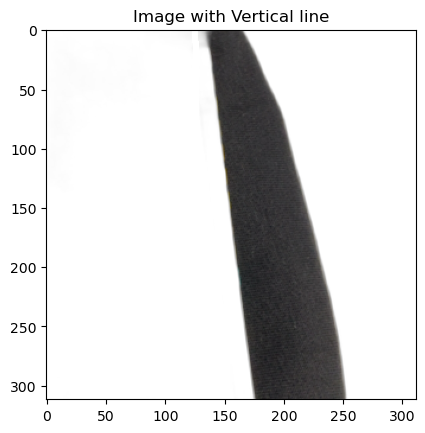

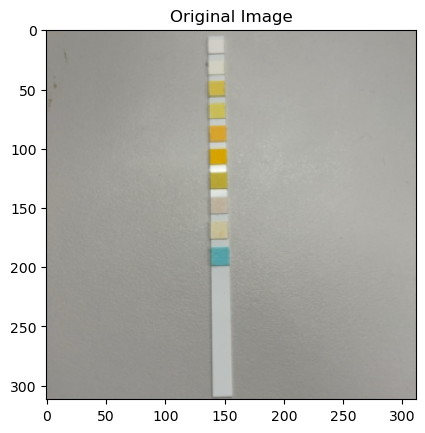

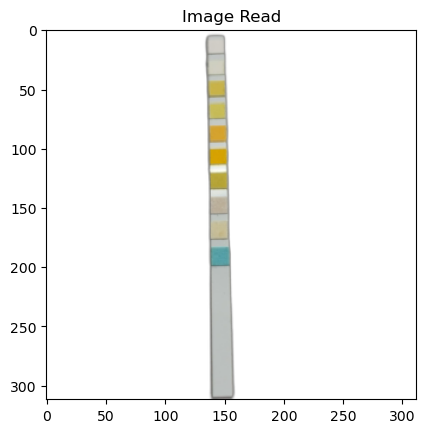

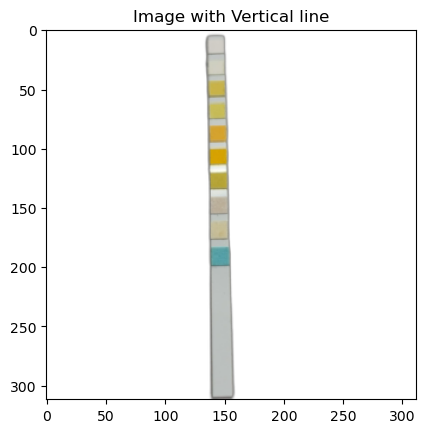

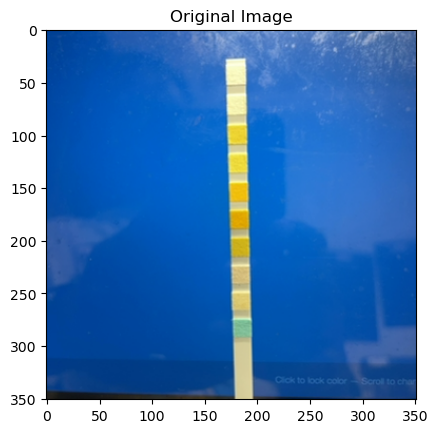

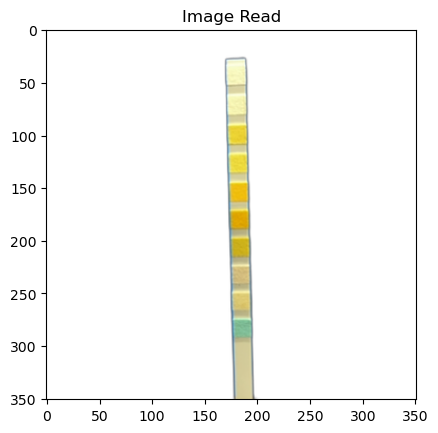

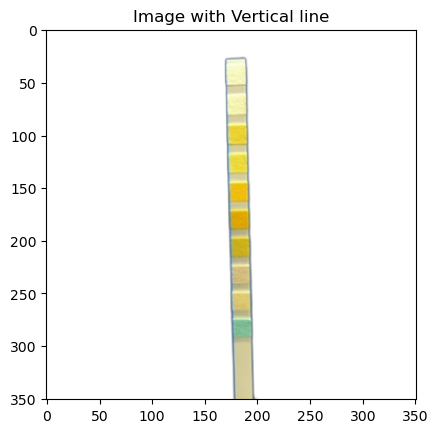

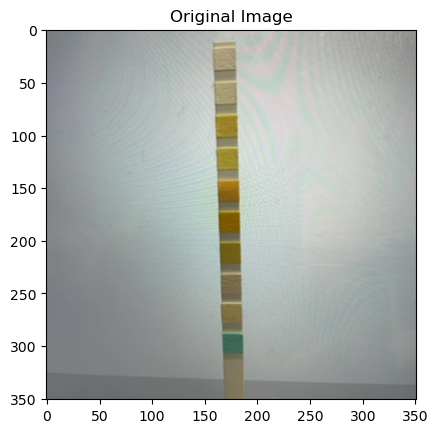

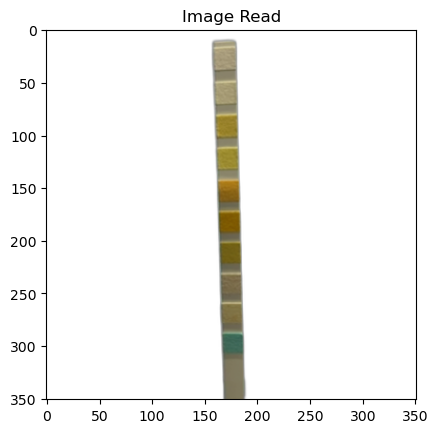

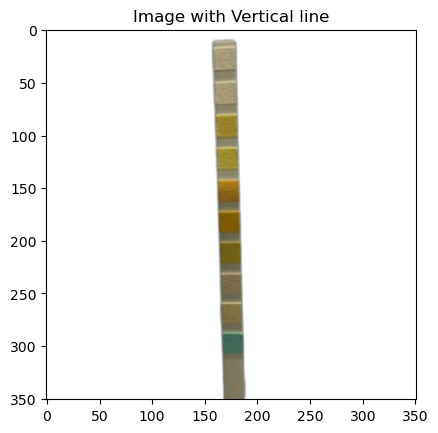

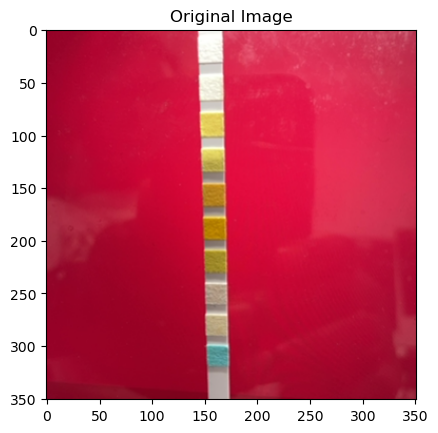

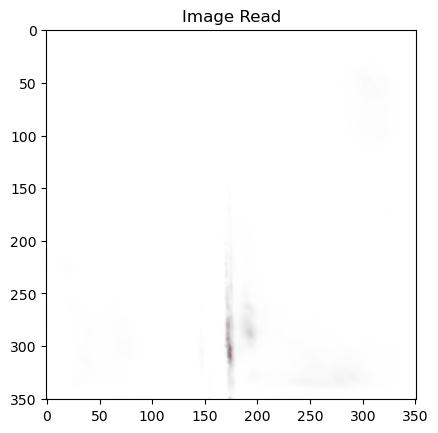

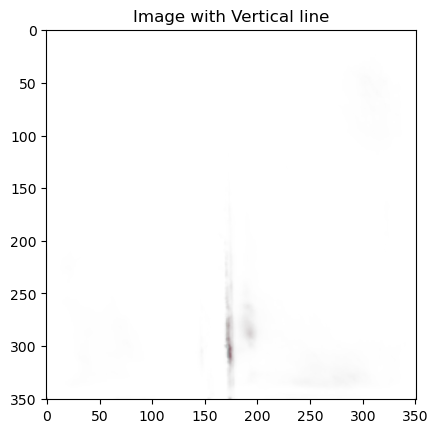

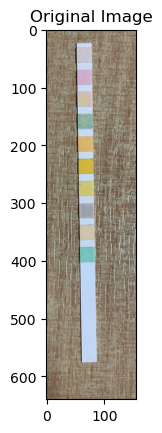

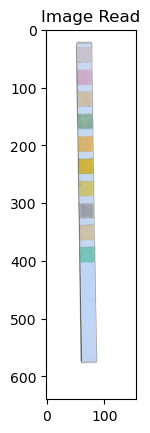

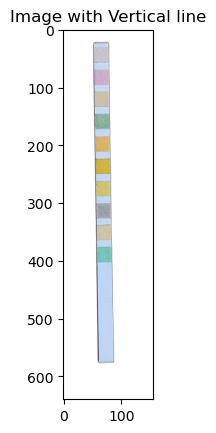

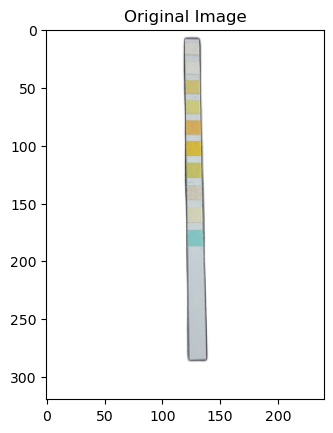

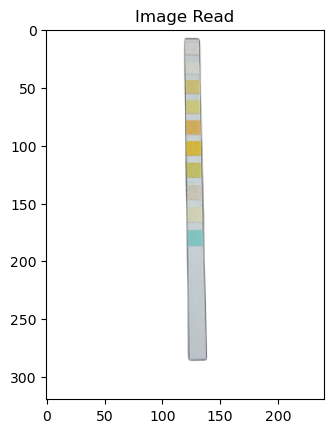

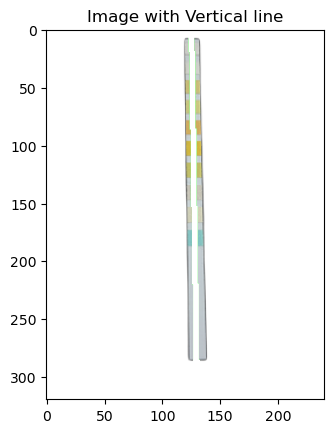

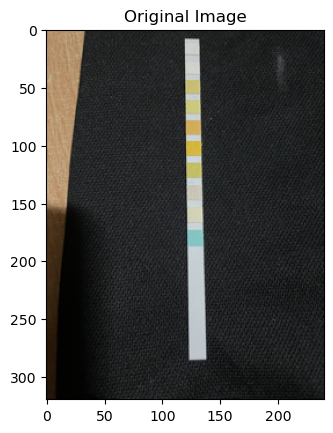

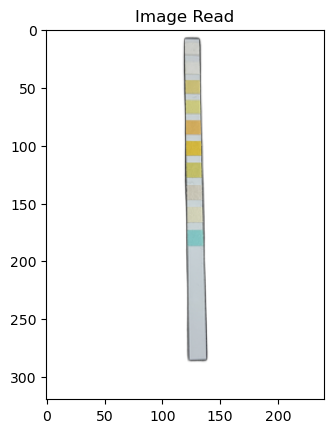

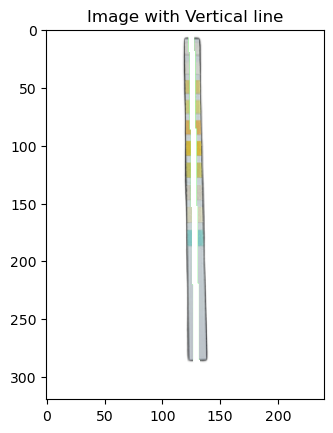

In [86]:
image_paths = [
        '/Users/lanresodeinde/Desktop/final_year_app/backend/app/lanre/shots/1676223304.png',
          '/Users/lanresodeinde/Desktop/final_year_app/backend/app/lanre/shots/1676322437.png',
          '/Users/lanresodeinde/Desktop/final_year_app/backend/app/lanre/shots/1676322641.png',
          '/Users/lanresodeinde/Desktop/final_year_app/backend/app/lanre/shots/1676323628.png',
          '/Users/lanresodeinde/Desktop/final_year_app/backend/app/lanre/shots/1676323698.png',
          '/Users/lanresodeinde/Desktop/final_year_app/backend/app/lanre/shots/1676323713.png', 
          '/Users/lanresodeinde/Downloads/urine-dipstick.png',
          '/Users/lanresodeinde/Downloads/output.png',
          '/Users/lanresodeinde/Downloads/IMG_0694 Small.png',
         ]

# img = cv2.imread('/Users/lanresodeinde/Downloads/output.png')

def crop_image(image_path):
    input = Image.open(image_path)
    plt.figure()
    plt.title("Original Image")
    plt.imshow(input)
    output = remove(input)
    # output.show()
#     plt.imshow(output)
#     output.save(output_path)
    return output

start = (0,0)
end =(0,0)

def draw_vertical_line(image_path):
    # crop image function from the pillow cell
    # image will be saved to a output.png file
    pillow_img = crop_image(image_path)
    
    # read the output from the output.png file in the directory
#     img = cv2.imread('/Users/lanresodeinde/Downloads/output.png')
    img = np.array(pillow_img)
    plt.figure()
    plt.title("Image Read")
    plt.imshow(img)
    rows,cols = img.shape[:2]
    [vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
    lefty = int((-x*vy/vx) + y)
    righty = int(((cols-x)*vy/vx)+y)
    cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),3)
    print(img.shape)
    start = (cols-1,righty)
    end = (0,lefty)
    print(f'{start}, {end}')
    plt.figure()
    plt.title("Image with Vertical line")
    plt.imshow(img)
    
for path in image_paths:
    draw_vertical_line(path)

# SOM Map

170 92
[0 0 0]


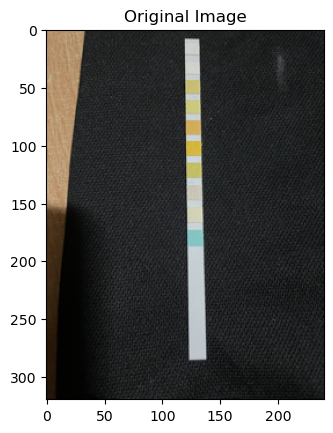

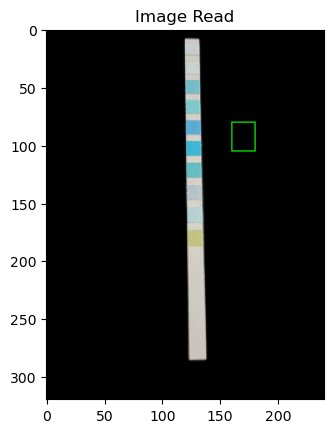

In [88]:
def draw_rectangle(img):
    pillow_img = crop_image(image_path)

    img = np.array(pillow_img)
    plt.figure()
    plt.title("Image Read")
    plt.imshow(img)
    # convert image to rgb
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x1 = 160
    y1 = 80
    x2 = 180
    y2 = 105

    rectangle = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0))

    midpoint_x = round((x1+x2)/ 2)
    midpoint_y = round((y1+y2) / 2)

    print(midpoint_x, midpoint_y)
    # cv2.rectangle(img, (midpoint_x, midpoint_y), ((midpoint_x+2), (midpoint_y+2)), (0, 255, 0))

    colour = img[midpoint_y,midpoint_x] # row major, like in opencv
    print(colour)

    plt.imshow(rectangle)
    
img_path = '/Users/lanresodeinde/Downloads/IMG_0694 Small.png' # original
draw_rectangle(img_path)
